<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Course GML - CRAPAUDUC Project

In [2]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns

## Data importation

In [3]:
# Import labels file of a chosen camera
df_labels = pd.read_csv('data/labels_count/labels_Caméra01.csv')
df_labels.head()

,timestamp,crapaud,grenouille,triton
0,1.489003e+09,0.0,0.0,0.0
1,1.489003e+09,0.0,0.0,0.0
2,1.489003e+09,0.0,0.0,0.0
3,1.489003e+09,0.0,0.0,0.0
4,1.489003e+09,0.0,0.0,0.0


## Data preparation

In [4]:
# Transform timestamp (1489002529) in datetime (2017-03-08 20:48:49) 
df_labels['dateheure'] = [dt.fromtimestamp(x) for x in df_labels['timestamp']]

# Drop the timestamp column as we won't need it anymore
df_labels = df_labels.drop(columns=['timestamp'])

In [5]:
# Split datetime into date and time
df_labels['date']   = [d.date() for d in df_labels['dateheure']]
df_labels['h_m_s']  = [d.time() for d in df_labels['dateheure']]
df_labels['h']      = [d.hour for d in df_labels['dateheure']]

df_labels['annee']  = [d.year for d in df_labels['dateheure']]
df_labels['mois']   = [d.strftime("%B") for d in df_labels['dateheure']]
df_labels['jour']   = [d.day for d in df_labels['dateheure']]

In [6]:
df_labels.head()

,crapaud,grenouille,triton,dateheure,date,h_m_s,h,annee,mois,jour
0,0.0,0.0,0.0,2017-03-08 20:48:49,2017-03-08,20:48:49,20,2017,March,8
1,0.0,0.0,0.0,2017-03-08 20:48:50,2017-03-08,20:48:50,20,2017,March,8
2,0.0,0.0,0.0,2017-03-08 20:48:51,2017-03-08,20:48:51,20,2017,March,8
3,0.0,0.0,0.0,2017-03-08 20:48:52,2017-03-08,20:48:52,20,2017,March,8
4,0.0,0.0,0.0,2017-03-08 20:48:53,2017-03-08,20:48:53,20,2017,March,8


## Exploratory analysis

### Counts and relative percentage of quantity observed, for each label

In [7]:
def counts_and_percentage_in_df(df, feature):
    print('Count :\n', df[feature].value_counts(), '\n')
    print('Percentage :\n', round(df[feature].value_counts(normalize=True)*100,2), '\n')
    
    print('Relative frequency (y-axis) of number of `' + feature + '` (x-axis) observed in data set')
    df[feature].value_counts(normalize=True).plot(kind='bar')

Count :
 0.0    14337
Name: crapaud, dtype: int64 

Percentage :
 0.0    100.0
Name: crapaud, dtype: float64 

Relative frequency (y-axis) of number of `crapaud` (x-axis) observed in data set


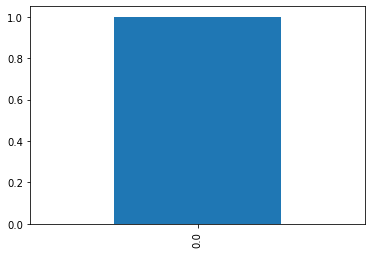

In [8]:
counts_and_percentage_in_df(df_labels, 'crapaud')

Count :
 0.0    14124
1.0      167
2.0       40
3.0        6
Name: grenouille, dtype: int64 

Percentage :
 0.0    98.51
1.0     1.16
2.0     0.28
3.0     0.04
Name: grenouille, dtype: float64 

Relative frequency (y-axis) of number of `grenouille` (x-axis) observed in data set


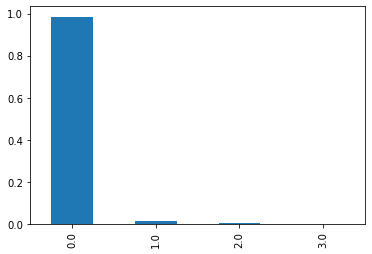

In [9]:
counts_and_percentage_in_df(df_labels, 'grenouille')

Count :
 0.0    14237
1.0      100
Name: triton, dtype: int64 

Percentage :
 0.0    99.3
1.0     0.7
Name: triton, dtype: float64 

Relative frequency (y-axis) of number of `triton` (x-axis) observed in data set


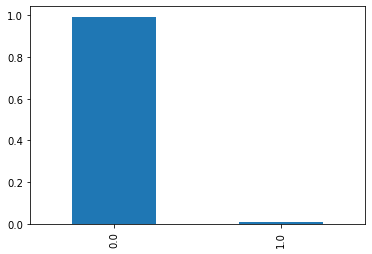

In [10]:
counts_and_percentage_in_df(df_labels, 'triton')

### Number of observation per date, for each label

In [11]:
def scatter_date_per_feature(df, feature):
    plt.figure(figsize=(15,3))
    plt.ylim([-0.5,5])
    plt.scatter(df['date'], df[feature])
    plt.xlabel('date')
    plt.ylabel('nombre de ' + feature)
    plt.grid()

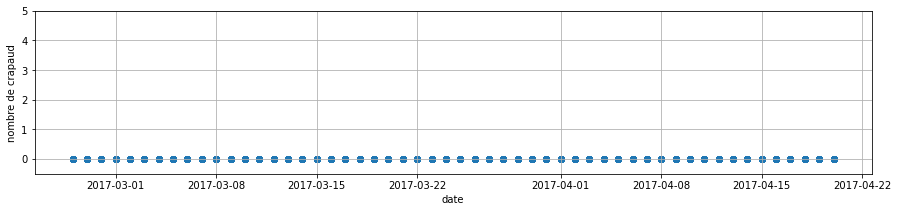

In [12]:
scatter_date_per_feature(df_labels, 'crapaud')

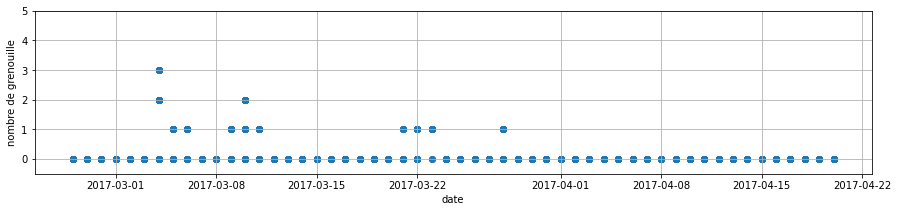

In [13]:
scatter_date_per_feature(df_labels, 'grenouille')

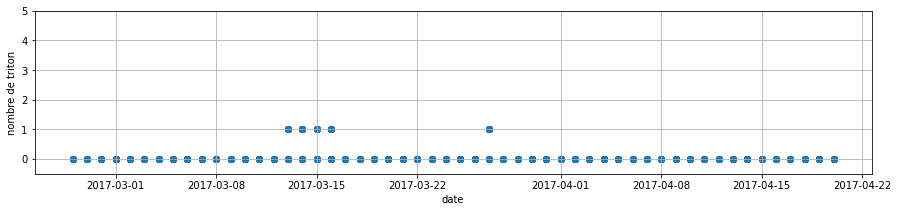

In [14]:
scatter_date_per_feature(df_labels, 'triton')

### Labels observed (date - time - number of observation)

In [15]:
# Creation of a dataframe containing only the samples where one of the labels' value is not zero
df_activated_label = df_labels.loc[(df_labels['crapaud'] != 0)    |
                                   (df_labels['grenouille'] != 0) |
                                   (df_labels['triton'] != 0)]

In [16]:
# Size of new dataframe 
# = number of samples in given dataset where we observed at least one of the labels
df_activated_label.shape

(313, 10)

In [17]:
# in progress ...

#df_activated_label.groupby([df_activated_label['dateheure'].dt.hour])
#df_activated_label

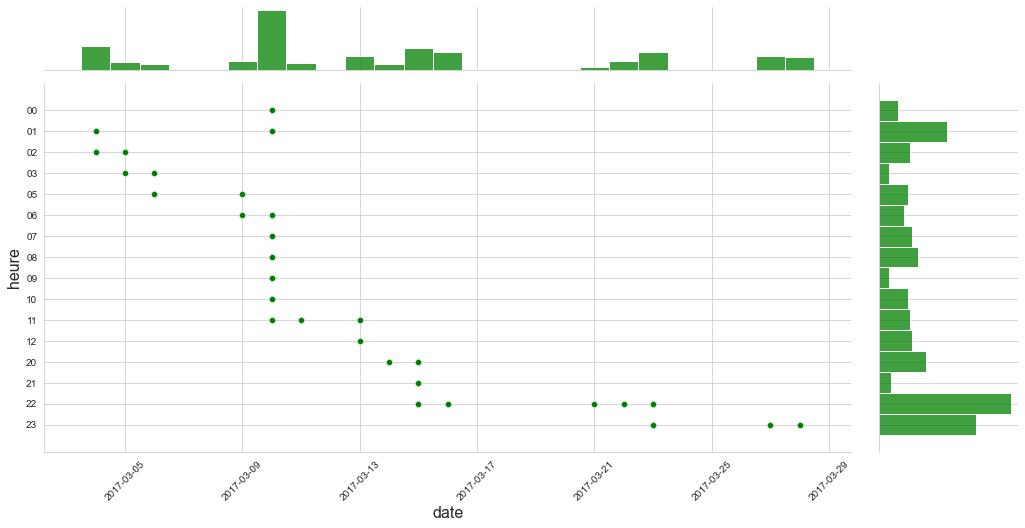

In [18]:
# Regroupement des données par heure d'observation

# Reprise du df avec les données labellées pour le trier par heures croissantes
df_activated_sorted_h = df_activated_label.sort_values(by=['h_m_s'])

# Pour n'avoir que les heures pleines sur l'axe des y
y = [k.strftime('%H') for k in df_activated_sorted_h['h_m_s']]

sns.set_style("whitegrid")
plot = sns.jointplot(data=df_activated_label, x ='date',color="g", y=y)
plot.set_axis_labels('date', 'heure', fontsize=16)

plot.ax_joint.tick_params(axis="x", rotation=45)

plot.fig.set_figwidth(15)
plot.fig.set_figheight(7)

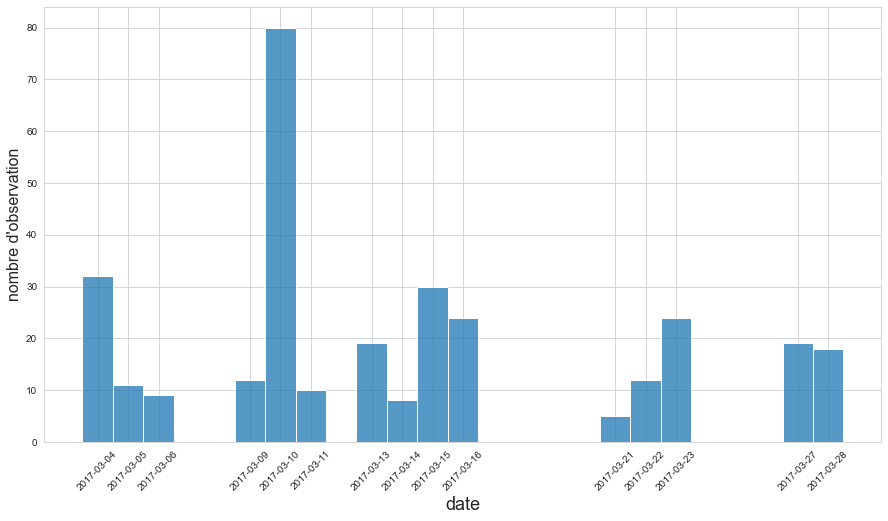

In [22]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés par jour

plt.figure(figsize=(15,8))

sns.histplot(data=df_activated_label, x='date')
plt.xticks(df_activated_label.date.unique(), rotation=45)

plt.xlabel('date', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

Comme on voit qu'il n'y a de grenouille/triton/crapaud repérés seulement en mars, on fait un petit contrôle des données :

In [26]:
df_activated_label.date.value_counts()

2017-03-10    80
2017-03-04    32
2017-03-15    30
2017-03-16    24
2017-03-23    24
2017-03-13    19
2017-03-27    19
2017-03-28    18
2017-03-09    12
2017-03-22    12
2017-03-05    11
2017-03-11    10
2017-03-06     9
2017-03-14     8
2017-03-21     5
Name: date, dtype: int64

In [20]:
df_labels.date.value_counts()

2017-02-27    2651
2017-03-05    1974
2017-02-26    1774
2017-02-28    1425
2017-03-01     746
2017-03-18     410
2017-03-04     304
2017-04-10     279
2017-04-12     249
2017-03-06     235
2017-04-01     228
2017-04-03     216
2017-04-19     214
2017-04-20     203
2017-04-11     175
2017-04-14     162
2017-03-22     162
2017-03-10     159
2017-03-02     154
2017-03-09     152
2017-03-16     140
2017-03-17     140
2017-04-05     129
2017-04-02     124
2017-03-13     121
2017-04-08     120
2017-04-09     113
2017-04-13     102
2017-03-30     102
2017-03-31      99
2017-04-04      99
2017-03-07      92
2017-04-07      89
2017-03-12      88
2017-03-28      79
2017-04-18      74
2017-04-06      73
2017-03-27      70
2017-03-26      66
2017-03-11      63
2017-04-16      61
2017-03-15      57
2017-03-25      47
2017-03-29      46
2017-03-20      41
2017-03-03      31
2017-03-19      31
2017-03-21      30
2017-03-23      26
2017-04-17      26
2017-03-24      24
2017-04-15      21
2017-03-14  

On voit donc ici que beaucoup de nos données sont de mars ; il n'est donc pas surprenant que les données avec 'label actif' soient en mars. Regroupons le nombre de données que l'on a par mois : 

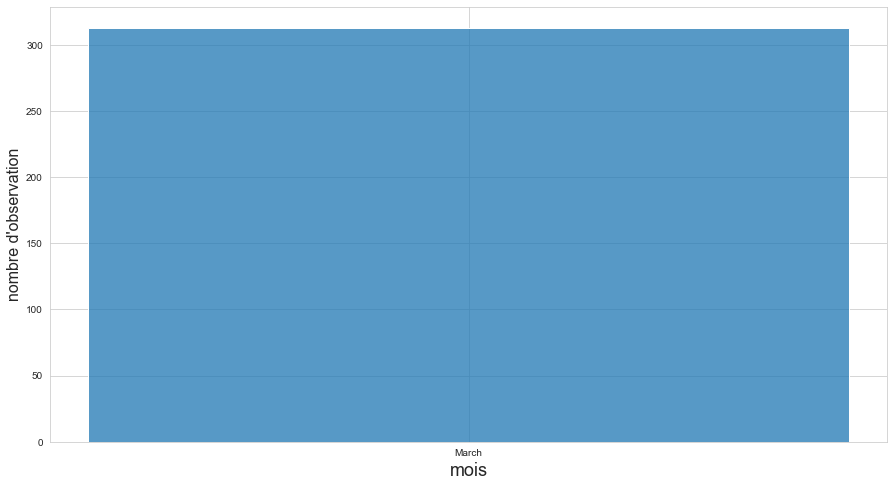

In [21]:
plt.figure(figsize=(15,8))

sns.histplot(data=df_activated_label, x='mois')

plt.xlabel('mois', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

In [23]:
# Idée pour plus tard : dissocier les graphiques suivant les combinaisons d'animaux repérés
# sns.histplot(data=df_activated_label, x='date', hue='c_g_t')

# Remaining questions : 
# - quand on a plusieurs photos a la suite => plusieurs données alors qu'une observation 
# - météo : pas assez de données => on laisse tomber ? Check avec les données de bounding box de Joris

Regrouper les données par heure : 
- ébauche de groupby : https://codenostra.com/fr/comment-regrouper-les-dataframes-par-heure-en-utilisant-lhorodatage-avec-pandas.html
